In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn = pd.read_csv('churn_logistic.csv')
churn.shape

(5700, 21)

In [4]:
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(churn.drop(columns = ['Churn']),
                                                    churn['Churn'], 
                                                    test_size=0.2 , 
                                                    random_state= 2)

In [7]:
y_train.value_counts()

0    2282
1    2278
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Day Mins'>

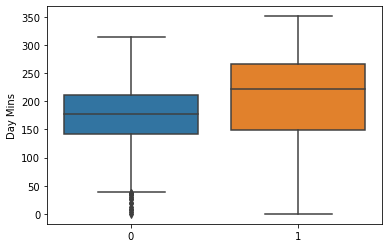

In [8]:
sns.boxplot(y=X_train['Day Mins'], x = y_train.values)

<AxesSubplot:ylabel='Account Length'>

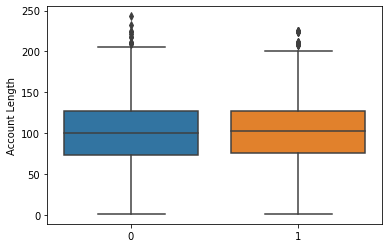

In [9]:
sns.boxplot(y=X_train['Account Length'], x = y_train.values)

In [10]:
cols = ['Day Mins', 'Eve Mins', 'CustServ Calls', 'Intl Plan','VMail Message']
X_train = X_train[cols].values
X_test = X_test[cols].values

In [11]:
X_train[:5]

array([[173.2, 196.8,   3. ,   0. ,   0. ],
       [224.5, 200.7,   2. ,   0. ,   0. ],
       [105.2, 341.3,   2. ,   0. ,  40. ],
       [201.4, 229.4,   1. ,   0. ,   0. ],
       [135.9, 244.5,   4. ,   0. ,  28. ]])

In [12]:
X_test[:5]

array([[155.2, 135.9,   3. ,   0. ,   0. ],
       [153.7, 137.8,   1. ,   0. ,  26. ],
       [291.8, 214.3,   0. ,   0. ,   0. ],
       [301.5, 257.7,   4. ,   0. ,   0. ],
       [257.4, 261.1,   2. ,   0. ,   0. ]])

### Scaling - Standardisation

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train) # it will learn mu and sig across all the features

StandardScaler()

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### Scratch Implemenation of Scaling

In [16]:
mu = np.round(X_train.mean(axis=0), 2)

In [17]:
sig = np.round(X_train.std(axis=0), 2)

In [18]:
updated_X = (X_train - mu)/sig

In [19]:
updated_X.mean(axis = 0)

array([-2.68011734e-16,  1.28552140e-16, -4.20716094e-17, -6.70029334e-17,
        5.57059272e-17])

In [20]:
updated_X.std(axis = 0)

array([1., 1., 1., 1., 1.])

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
model = LogisticRegression()

In [57]:
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
y_pred = model.predict(X_test)

In [59]:
model.score(X_train, y_train)

0.7607456140350877

In [60]:
model.score(X_test, y_test)

0.7552631578947369

In [61]:
model.coef_

array([[ 0.7966328 ,  0.30013949,  0.95421073,  0.91590545, -0.33169295]])

In [62]:
model.intercept_

array([0.04007244])

In [63]:
model.predict_proba(X_test)

array([[0.59262487, 0.40737513],
       [0.90350716, 0.09649284],
       [0.49805132, 0.50194868],
       ...,
       [0.83099051, 0.16900949],
       [0.06594887, 0.93405113],
       [0.71556721, 0.28443279]])

### What is the best lambda or C ? 

In [37]:
lamb = np.arange(0.01, 10000, 100)

In [38]:
C.round()

array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
        900., 1000., 1100., 1200., 1300., 1400., 1500., 1600., 1700.,
       1800., 1900., 2000., 2100., 2200., 2300., 2400., 2500., 2600.,
       2700., 2800., 2900., 3000., 3100., 3200., 3300., 3400., 3500.,
       3600., 3700., 3800., 3900., 4000., 4100., 4200., 4300., 4400.,
       4500., 4600., 4700., 4800., 4900., 5000., 5100., 5200., 5300.,
       5400., 5500., 5600., 5700., 5800., 5900., 6000., 6100., 6200.,
       6300., 6400., 6500., 6600., 6700., 6800., 6900., 7000., 7100.,
       7200., 7300., 7400., 7500., 7600., 7700., 7800., 7900., 8000.,
       8100., 8200., 8300., 8400., 8500., 8600., 8700., 8800., 8900.,
       9000., 9100., 9200., 9300., 9400., 9500., 9600., 9700., 9800.,
       9900.])

In [39]:
train_scores = [] 
test_scores = []


for lam in lamb:
    model = LogisticRegression(C = 1/lam)
    model.fit(X_train, y_train)

    tr_score = model.score(X_train, y_train)
    te_score = model.score(X_test, y_test)
    
    train_scores.append(tr_score)
    test_scores.append(te_score)

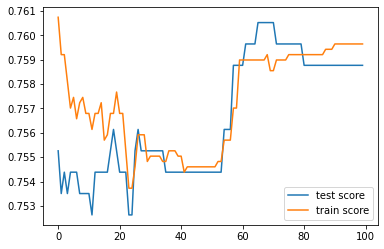

In [65]:
plt.plot(test_scores, label="test score")
plt.plot(train_scores, label ="train score")
plt.legend()

In [47]:
np.max(test_scores)

0.7605263157894737

In [48]:
np.argmax(test_scores)

65

In [49]:
0.01 + 100*65

6500.01

In [50]:
1/6500

0.00015384615384615385

In [52]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 1, 0])